# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Bitcoin API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
# Ethereum API URLs
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
btc_price = requests.get(btc_url)
# Extract btc row values from data
btc_row = btc_price.content
# Convert btc_price to a JSON file
btc_data = btc_price.json()

# Fetch current ETH price
eth_price = requests.get(eth_url)
# Extract eth row values from data
eth_row = eth_price.content
# Convert eth_price to a JSON file
eth_data = eth_price.json()

In [11]:
# Extract Prices from both btc_data and eth_data for further computation
btc_price = btc_data['data']['1']['quotes']['USD']['price']
eth_price = eth_data['data']['1027']['quotes']['USD']['price']

In [10]:
# Compute current value of my crpto
value_btc = my_btc * btc_price
value_eth = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${value_btc:0.2f}")
print(f"The current value of your {my_eth} ETH is ${value_eth:0.2f}")

The current value of your 1.2 BTC is $48223.20
The current value of your 5.3 ETH is $13496.40


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [12]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [15]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [22]:
# Format current date as ISO format
data = pd.Timestamp("2021-06-10", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_ticker = api.get_barset(
    tickers,
    timeframe,
    start = data,
    end = data,
    limit = 1000
).df
# Preview DataFrame
df_ticker.head()

AGG                                       SPY  \
                            open    high       low  close   volume    open   
time                                                                         
2021-06-10 00:00:00-04:00  115.3  115.31  114.8605  115.3  3665931  422.96   

                                                             
                             high     low   close    volume  
time                                                         
2021-06-10 00:00:00-04:00  424.63  421.55  423.58  43574416

In [25]:
# Pick AGG and SPY close prices
agg_close_p = df_ticker["AGG"]["close"].item()
spy_close_p = df_ticker["SPY"]["close"].item()

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $115.3
Current SPY closing price: $423.58


In [26]:
# Compute the current value of shares
spy_value = my_spy * spy_close_p
agg_value = my_agg * agg_close_p

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${agg_value:0.2f}")

The current value of your 50 SPY shares is $21179.00
The current value of your 200 AGG shares is $23060.00


### Savings Health Analysis

In [28]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
asset_dictionary = {'Amount': [value_btc+value_eth, spy_value+agg_value]}

# Create savings DataFrame
df_savings = pd.DataFrame(asset_dictionary,index=['Crypto','Shares'])

# Display savings DataFrame
display(df_savings)

,Amount
Crypto,61719.597
Shares,44239.000


array([<AxesSubplot:ylabel='Amount'>], dtype=object)

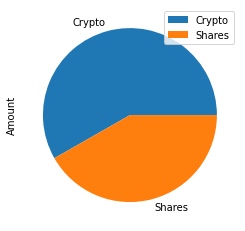

In [32]:
# Plot savings pie chart
df_savings.plot(kind='pie', subplots=True)

In [34]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
savings = df_savings.sum().item()

# Validate saving health
if savings > emergency_fund:
    print("You have more than 3x of your monthly income in this fund!")
elif savings == emergency_fund:
    print("You reached your financial goal!")
else:
    print(f'You are ${emergency_fund - savings} away from reaching the goal.')

You have more than 3x of your monthly income in this fund!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [35]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [37]:
# Get 5 years' worth of historical data for SPY and AGG
df_stockdata = api.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit = 1000
).df

# Display sample data
df_stockdata.head()

AGG                                       \
                             open     high       low    close   volume   
time                                                                     
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153   
2017-05-17 00:00:00-04:00  109.35  109.600  109.2800  109.560  2263851   

                              SPY                                      
                             open    high     low    close     volume  
time                                                                   
2017-05-11 00:00:00-04:00  239.35  239.57  238.13  239.410   45435690  
2017-05-12 00:00:00-04:00  239.09  239.21  238.67  239.030   35283567  
2017-05-15 00:00:00-04:00  239.47  240.44  239.45  240.245   42230620  
2017-05-16 00:00:00-04:00  240.62  240.67  239.63  240.100   37206183  
2017-05-17 00:00:00-04:00  238.10  238.64  235.75  235.850  118613594

In [38]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30 = MCSimulation(
    portfolio_data = df_stockdata,
    weights  = [0.4, 0.6],
    num_simulation = 500,
    num_trading_days = 252*30)

In [42]:
# Printing the simulation input data
MC_30.portfolio_data

AGG                                        \
                             open      high       low    close   volume   
time                                                                      
2017-05-11 00:00:00-04:00  108.35  108.5400  108.3435  108.515  1773499   
2017-05-12 00:00:00-04:00  108.81  108.9400  108.7800  108.920  1136553   
2017-05-15 00:00:00-04:00  108.85  108.9400  108.8200  108.890  1620264   
2017-05-16 00:00:00-04:00  108.88  109.1010  108.8800  109.000  1394153   
2017-05-17 00:00:00-04:00  109.35  109.6000  109.2800  109.560  2263851   
...                           ...       ...       ...      ...      ...   
2021-04-26 00:00:00-04:00  114.74  114.8015  114.6500  114.650  2867784   
2021-04-27 00:00:00-04:00  115.13  115.1300  114.3700  114.370  3421667   
2021-04-28 00:00:00-04:00  114.45  114.4685  114.2000  114.440  6185936   
2021-04-29 00:00:00-04:00  114.14  114.3700  114.0900  114.370  5796983   
2021-04-30 00:00:00-04:00  114.41  114.5150  114.3300  114.500  5160765   

                                           SPY                             \
                          daily_return    open    high       low    close   
time                                                                        
2017-05-11 00:00:00-04:00          NaN  239.35  239.57  238.1300  239.410   
2017-05-12 00:00:00-04:00     0.003732  239.09  239.21  238.6700  239.030   
2017-05-15 00:00:00-04:00    -0.000275  239.47  240.44  239.4500  240.245   
2017-05-16 00:00:00-04:00     0.001010  240.62  240.67  239.6300  240.100   
2017-05-17 00:00:00-04:00     0.005138  238.10  238.64  235.7500  235.850   
...                                ...     ...     ...       ...      ...   
2021-04-26 00:00:00-04:00    -0.000871  417.44  418.22  416.8111  417.640   
2021-04-27 00:00:00-04:00    -0.002442  417.91  418.14  416.3000  417.480   
2021-04-28 00:00:00-04:00     0.000612  417.81  419.01  416.9000  417.350   
2021-04-29 00:00:00-04:00    -0.000612  420.33  420.72  416.4400  419.980   
2021-04-30 00:00:00-04:00     0.001137  417.63  418.54  416.3400  417.300   

                                                   
                              volume daily_return  
time                                               
2017-05-11 00:00:00-04:00   45435690          NaN  
2017-05-12 00:00:00-04:00   35283567    -0.001587  
2017-05-15 00:00:00-04:00   42230620     0.005083  
2017-05-16 00:00:00-04:00   37206183    -0.000604  
2017-05-17 00:00:00-04:00  118613594    -0.017701  
...                              ...          ...  
2021-04-26 00:00:00-04:00   44689009     0.002208  
2021-04-27 00:00:00-04:00   45962264    -0.000383  
2021-04-28 00:00:00-04:00   45533863    -0.000311  
2021-04-29 00:00:00-04:00   70595229     0.006302  
2021-04-30 00:00:00-04:00   73129109    -0.006381  

[1000 rows x 12 columns]

In [44]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998680,1.006607,0.999807,0.999836,1.008062,1.014906,1.006906,0.994093,0.993819,0.984307,...,0.995441,0.996346,1.002593,0.996856,1.003215,0.994291,1.004166,0.999873,0.997788,0.986272
2,1.001142,1.007010,1.005188,0.993673,1.024598,1.021697,1.009452,0.991969,1.000009,0.985405,...,0.991271,0.981248,1.006179,1.011250,1.004893,1.002470,1.014213,0.995832,1.005166,0.988576
3,1.001154,1.016206,0.995368,0.998727,1.038066,1.026984,1.008046,0.988697,0.990359,0.980448,...,0.978679,0.982625,0.999016,1.015338,1.008461,0.997689,1.023423,1.019508,1.003268,1.002034
4,1.002080,1.020506,0.989229,1.005409,1.048278,1.016174,1.014315,0.988281,0.999272,0.978714,...,0.987693,0.991251,0.998020,1.027348,1.002083,0.999727,1.027842,1.014335,0.989720,1.002970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,30.689122,40.242994,30.824695,17.272310,10.055621,40.459874,11.386905,35.810961,14.516656,71.860513,...,14.291339,32.649269,27.532367,6.182722,23.772018,5.767257,26.179478,7.655651,10.941678,38.373339
7557,30.713448,40.674929,30.790396,17.355386,9.923307,40.575993,11.372167,35.912696,14.434492,71.942796,...,14.306650,32.724381,27.941318,6.242018,23.783245,5.736109,26.283758,7.668850,11.008186,38.866252
7558,30.743691,40.350351,30.409678,17.301941,9.797498,40.466375,11.408049,36.057441,14.601103,71.756245,...,14.478829,32.426784,28.053337,6.227253,24.079120,5.787283,26.492980,7.792959,10.930806,38.580654
7559,30.536223,40.040447,30.414164,17.275575,9.861968,39.790957,11.415440,36.453154,14.547385,71.489088,...,14.326519,32.422166,28.068244,6.231173,24.393563,5.795981,26.586873,7.756980,11.041540,38.698536


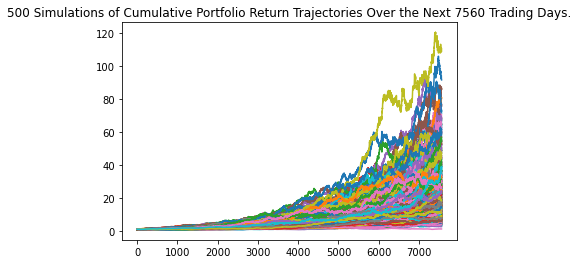

In [46]:
# Plot simulation outcomes
line_plot = MC_30.plot_simulation()

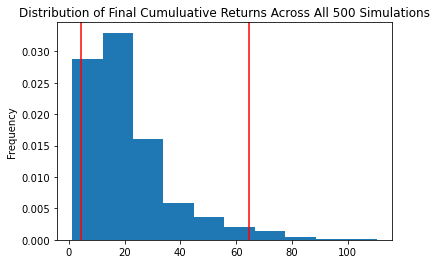

In [47]:
# Plot probability distribution and confidence intervals
prob_dist = MC_30.plot_distribution()

### Retirement Analysis

In [48]:
# Fetch summary statistics from the Monte Carlo simulation results
sum_stat = MC_30 .summarize_cumulative_return()

# Print summary statistics
print(sum_stat)

count           500.000000
mean             21.315373
std              15.618764
min               1.193665
25%              10.545399
50%              17.423892
75%              26.873083
max             110.321511
95% CI Lower      4.240507
95% CI Upper     64.525482
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [50]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
CI_lower = round(sum_stat[8]*initial_investment,2)
CI_upper = round(sum_stat[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${CI_lower} and ${CI_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $84810.15 and $1290509.65


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [51]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
CI_lower = round(sum_stat[8]*initial_investment,2)
CI_upper = round(sum_stat[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${CI_lower} and ${CI_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $127215.22 and $1935764.47
